In [1]:
import os
import json

import numpy as np
import requests
from datetime import datetime
import web3
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import resample

In [9]:
web3_geth = web3.Web3(web3.Web3.HTTPProvider("http://127.0.0.1:8546",request_kwargs={'timeout': 3600}))
web3_geth.isConnected()

True

In [10]:
web3_erigon = web3.Web3(web3.Web3.HTTPProvider("http://127.0.0.1:8545",request_kwargs={'timeout': 3600}))
web3_erigon.isConnected()

True

## Account Balance divergence - Transaction based

We know the last transaction of our transaction list is in block 15697654 in the Mainnet so we assume that this is the last block for consideration
0xAE62993477095e5b09e4cA9aa7732F34D25197AC
Start block is always: 15537393
Last block for forked chain is 15537420

In [55]:
tx_fork = pd.read_csv("tx_fork.csv")
tx_mainnet = pd.read_csv("transactions_mainnet.csv")

We will "only analyze the top 30 accounts -> they have at least 10 transactions)

In [89]:
top_30 = tx_fork["sender"].value_counts().keys()[:30]

In [104]:
account_balances = []

In [11]:
class Account:
    def __init__(self):
        self.account_balance_mainnet = []
        self.account_balance_fork = []
        self.first_block = 15537393
        self.last_mainnet_block = 0
        self.address = 0


In [156]:
for index, address in enumerate(top_30[20:], 20):
    print(index)
    print(address)
    account = Account()
    account_balance_mainnet = []
    account_balance_fork = []
    last_block = tx_mainnet[tx_mainnet["sender"] == address]["block_number"].max()
    for block_index_mainnet in range(15537393, last_block):
        amount = web3_geth.eth.get_balance(address, block_index_mainnet)
        account_balance_mainnet.append(amount)

    for block_index_fork in range(15537393, 15537420):
        amount = web3_erigon.eth.get_balance(address, block_index_fork)
        account_balance_fork.append(amount)
    account.account_balance_mainnet = account_balance_mainnet
    account.account_balance_fork = account_balance_fork
    account.last_mainnet_block = last_block
    account.address = address
    account_balances.append(account)


20
0x3df9aF02B8EFE52855ba8C2b8B138bAF3B51F1Bc
21
0xCf1CfF27a705ACce78788C78Fb61D3F87801a423
22
0x0039b625b1d8632C7a0057c964EC58a9F39789d3
23
0x479Bc00624e58398f4Cf59D78884d12Fb515790A
24
0x3443006ED920730005D88267c49f77aBcde749AF
25
0xddB561Ca97F0D1A800B4ad230042d3BF5B7Da3aA
26
0x34EC9E3A1aC200ea58744Ced891015152130E400
27
0x5E2B6c6B2240d582995537D3FafdB556E4A3822F
28
0x625f511C4E66B82750BC6bFe6Ce6C16c076A313b
29
0xeB6c4bE4b92a52e969F4bF405025D997703D5383


In [201]:
scaler = int((len(account_balances[13].account_balance_mainnet) / (len(account_balances[13].account_balance_fork))))

In [ ]:
for account in account_balances:
    plt.figure(facecolor='white')
    plt.plot(resample(account.account_balance_mainnet, 26), label="Mainnet", color="red")
    plt.plot(account.account_balance_fork, label="Fork", color="blue")
    plt.legend()


    fig = plt.gcf()
    fig.set_dpi(90)
    fig.set_figwidth(11)
    fig.set_figheight(6)
    fig.savefig("graphs/account_balance_transactions_v2/" + str(account.address), dpi=300)

In [166]:
data = [account.__dict__ for account in account_balances]

In [167]:
for index, account in enumerate(data):
    with open("accounts_json/" + str(index) + ".json", "w") as outfile:
        json.dump(account, outfile, default=str)

In [2]:
accounts = []
for filename in os.listdir("accounts_json"):
    with open(os.path.join("accounts_json", filename)) as file:
        data = json.load(file)
        accounts.append(data)

In [8]:
def diff_main_fork(d):
    diff = abs(d["account_balance_mainnet"][-1] - d["account_balance_fork"][-1])
    d["diff"] = diff
    return diff

In [15]:
sorted_accounts = sorted(accounts, key=diff_main_fork, reverse=False)

In [16]:
sorted_accounts

[{'account_balance_mainnet': [17176325707958293683,
   17176325707958293683,
   17176325707958293683,
   17176325707958293683,
   17176325707958293683,
   17171954417056302123,
   17171954417056302123,
   17145757455733340739,
   17145757455733340739,
   17127741924695053404,
   17127741924695053404,
   17125044724544514354,
   17115038792442065649,
   17102926473336556229,
   17102926473336556229,
   17100516176704215335,
   17088318869314190733,
   17088318869314190733,
   17088318869314190733,
   17076599330600708805,
   17066331661654490361,
   17066331661654490361,
   17017916895304852065,
   17017916895304852065,
   17017916895304852065,
   17015663132799504333,
   17004442652076435304,
   16994251633437234656,
   16994251633437234656,
   16994251633437234656,
   16994251633437234656,
   16994251633437234656,
   16994251633437234656,
   16994251633437234656,
   16994251633437234656,
   16990887000135102536,
   16990887000135102536,
   16927500695746907384],
  'account_balance_for

In [18]:
for block_index_fork in range(15537393, 15537420):
    amount = web3_erigon.eth.get_balance("0xeB6c4bE4b92a52e969F4bF405025D997703D5383", block_index_fork)
    print(amount)

2178699952314952946384
2178699952314952946384
2178699952314952946384
2178699952314952946384
2178699952314952946384
2178699952314952946384
2178699952314952946384
2178699952314952946384
2178699952314952946384
2178699952314952946384
2178699952314952946384
2178699952314952946384
2178699952314952946384
2178699952314952946384
2178699952314952946384
2178699952314952946384
2178699952314952946384
2178699952314952946384
2178699952314952946384
2178699952314952946384
2178699952314952946384
2178699952314952946384
2178699952314952946384
2178699952314952946384
2178699952314952946384
2178699952314952946384
2178699952314952946384


In [2]:
accounts = []
for filename in os.listdir("accounts_json/transaction_based"):
    with open(os.path.join("accounts_json/transaction_based", filename)) as file:
        data = json.load(file)
        accounts.append(data)

In [3]:
accounts

[{'account_balance_mainnet': [435106552852445137,
   435106552852445137,
   435106552852445137,
   435106552852445137,
   435106552852445137,
   435106552852445137,
   435106552852445137,
   419498460206919702,
   419498460206919702,
   419498460206919702,
   419498460206919702,
   419498460206919702,
   419498460206919702,
   419498460206919702,
   419498460206919702,
   419498460206919702,
   400888223690766518,
   400888223690766518,
   400888223690766518,
   400888223690766518,
   400888223690766518,
   400888223690766518,
   400888223690766518,
   400888223690766518,
   400888223690766518,
   400888223690766518,
   400888223690766518,
   400888223690766518,
   400888223690766518,
   400888223690766518,
   400888223690766518,
   400888223690766518,
   400888223690766518,
   400888223690766518,
   400888223690766518,
   400888223690766518,
   400888223690766518,
   400888223690766518,
   400888223690766518,
   400888223690766518,
   400888223690766518,
   400888223690766518,
   4008

In [ ]:
for account in accounts:
    fig, axs = plt.subplots(1, 2, figsize=(11, 6), facecolor='white')
    fig.suptitle("Account Balance: " + str(account["address"]))

    mainnet_balance_ether = [x / 10**18 for x in account["account_balance_mainnet"]]
    fork_balance_ether = [x / 10**18 for x in account["account_balance_fork"]]

    axs[0].plot(mainnet_balance_ether, label="Mainnet", color="red")
    axs[0].set_title("Mainnet Balance")
    axs[0].legend()
    axs[0].set_ylim(0, (max(max(mainnet_balance_ether), max(fork_balance_ether))) * 1.5)
    axs[0].set_xlabel("Block Range")
    axs[0].set_ylabel("Balance (in Ether)")

    axs[1].plot(fork_balance_ether, label="Fork", color="blue")
    axs[1].set_title("Fork Balance")
    axs[1].legend()
    axs[1].set_ylim(0, (max(max(mainnet_balance_ether), max(fork_balance_ether))) * 1.5)
    axs[1].set_xlabel("Block Range")

    fig.savefig("graphs/account_balance_transactions_v2/" + str(account["address"]), dpi=300)



### Transaction statistics

In [3]:
tx_fork = pd.read_csv("csv/tx_fork.csv")

In [4]:
tx_fork

,block_number,hash,sender,receiver,value,gas,gas_price,status
0,15537406.0,0xb77b6e50992a07d2279fb6671b801b669bb0df18f189...,0x65Fb9DB5fC926eB22aC5ae86e74242e0df44718c,0x24902AA0cf0000a08c0EA0b003B0c0bF600000E0,0,660583.0,7.492152e+11,True
1,15537406.0,0x51dd7a1de794a6861636c1fe7615b9cabd1e1a36cf68...,0xd7E1236C08731C3632519DCd1A581bFe6876a3B2,0x5f62593C70069AbB35dFe2B63db969e8906609d6,0,332631.0,1.543166e+11,True
2,15537406.0,0xa589aa1047affdb6f2c46ea56f05ef36ab72451deac9...,0xA43B1D1B6ac23c13038f2aC8bdFC0191a4542e6d,0xe2fB568edF0e4aC65B7e9f132Eb513148E3f0bcF,5501642089727004,21000.0,3.359460e+12,True
3,15537406.0,0xdcef06e13fca017ec02a5c68cb68cebb6295385206e3...,0xC665A60F22dDa926B920DEB8FFAC0EF9D8a17460,0x68b3465833fb72A70ecDF485E0e4C7bD8665Fc45,6310705001420515,209390.0,1.000000e+12,True
4,15537406.0,0x74c4d67f0e5774eaa8cb3ab33a4ef7cb2297cccf0ab6...,0x00006196242a1D328fe4B636995e796cb6c7a2Ac,0x00000000AE347930bD1E7B0F35588b92280f9e75,0,500000.0,5.533038e+11,True
...,...,...,...,...,...,...,...,...
6590,15537403.0,0xec0b7c4dcdc458193cfa48922c82ebc41493b0efe1fc...,0xCa7b6DaF018Be733E3570884E44EB91189CdAC23,0xdAC17F958D2ee523a2206206994597C13D831ec7,0,58676.0,1.428296e+11,True
6591,15537403.0,0xef68642278c1eb3b1b2c3b52a394f62d95abbd45f633...,0xAB9e1DDf806a20C9B06A94c655a59C3eDF495Ca5,0xE42caD6fC883877A76A26A16ed92444ab177E306,0,40195.0,1.428296e+11,True
6592,15537403.0,0xb82326f1cdadae7f2ea0541d6c2d3cf55e208e8143ea...,0x087A7AFB6975A2837453BE685EB6272576c0bC06,0x087A7AFB6975A2837453BE685EB6272576c0bC06,10000000000000000,21000.0,1.428296e+11,True
6593,15537403.0,0x2f44faf38603e946dd15515b9255f9a4ee00e4a6b9b2...,0xa757100141224EA375B160b76c46f78c36b2Da96,0xa757100141224EA375B160b76c46f78c36b2Da96,0,21000.0,1.428296e+11,True


In [5]:
gas_mean = tx_fork["gas"].mean()
gas_price_mean = tx_fork["gas_price"].mean()

In [6]:
fork_gas_mean = tx_fork.loc[tx_fork["status"] == False]["gas"].mean()
fork_gas_price_mean = tx_fork.loc[tx_fork["status"] == False]["gas_price"].mean()

In [7]:
main_gas_mean = tx_fork.loc[tx_fork["status"] == True]["gas"].mean()
main_gas_price_mean = tx_fork.loc[tx_fork["status"] == True]["gas_price"].mean()

In [8]:
price_df = pd.DataFrame(columns=["Total Mean Gas", "Total Mean Gas Price",
                                 "Fork Only Mean Gas", "Fork Only Mean Gas Price",
                                 "Mainnet Mean Gas", "Mainnet Mean Gas Price"])

In [9]:
price_df["Total Mean Gas"] = gas_mean

In [10]:
price_df.loc[0] = [gas_mean, gas_price_mean, fork_gas_mean, fork_gas_price_mean, main_gas_mean, main_gas_price_mean]

In [11]:
price_df.to_csv("csv/mean_transaction.csv")

## Account Balance divergence - Block based
Here we use a tracer to extract all transactions, including internal transactions

In [78]:
addresses = set()

In [79]:
def get_addresses(data):
    if 'from' in data and 'to' in data:
        addresses.add(data['from'])
        addresses.add(data['to'])
    if 'calls' in data:
        for child in data['calls']:
            get_addresses(child)


In [80]:
for block_number in range(15537393, 15537420):
    url = "http://localhost:8545"
    headers = {"Content-Type": "application/json"}

    data = {
        "id": 1,
        "method": "debug_traceBlockByNumber",
        "params": [block_number, {"tracer": "callTracer"}]
    }

    response = requests.post(url, headers=headers, data=json.dumps(data))
    transactions = response.json()["result"]
    for transaction in transactions:
        get_addresses(transaction)


In [97]:
address_balance = {}
for address in addresses:
    amount_geth = web3_geth.eth.get_balance(web3_geth.toChecksumAddress(address), 15537420)
    amount_erigon = web3_erigon.eth.get_balance(web3_erigon.toChecksumAddress(address), 15537420)

    address_balance[address] = (amount_geth, amount_erigon)

In [98]:
address_balance

{'0x85df0debb5758a2f282a1aace604ea0cd6337665': (1203046228303061481,
  1170580578527324521),
 '0x08359e9691bb743239713213fe4576c2ff7aefc0': (32219064123551878,
  33951359123551878),
 '0xdb28719f7f938507dbfe4f0eae55668903d34a15': (0, 0),
 '0xa0cc856ff5621ca9ba3a22b0c21f9de15f42cd87': (0, 0),
 '0x41de296570eacbbeffebb27d14530ed7f2bc9b23': (88728581210815000,
  88561115974177000),
 '0x2ad76512ee8f74f419329213b06440544451db78': (0, 0),
 '0x2dbd1b3535c787ab2f8e00a5adeceb10f219575a': (0, 0),
 '0x052311d4a56d75d211d85fba9d95d1bbb412488a': (79811000000000000,
  19411727669324818837),
 '0x9dfad1b7102d46b1b197b90095b5c4e9f5845bba': (0, 0),
 '0x738aaed7c783ac2de6f9804496d1ace497ab0a2b': (663200794285151005,
  662009621520971005),
 '0x7564c82b7c65b3034fb567de50184d75c3989d80': (0, 8998999990000000000),
 '0xfa6ae0942177e41a40f8f01eed98d1200b66544d': (0, 0),
 '0x5483b932e3d83b5eb6c46bda5fb0a4d9f4079f96': (12518274883845791826,
  12518456735436383826),
 '0x1e0447b19bb6ecfdae1e4ae1694b0c3659614e4e': (

In [112]:
account_balance_block = pd.DataFrame(columns=["Address", "Balance Mainnet", "Balance Fork", "Difference"])

In [113]:
account_balance_block

,Address,Balance Mainnet,Balance Fork,Difference


In [114]:
for index, address in enumerate(address_balance):
    account_balance_block.loc[index] = \
        [address, address_balance[address][0], address_balance[address][1], abs(address_balance[address][0] - address_balance[address][1])]


In [124]:
account_balance_block.sort_values(by="Difference", ascending=False)[:30]

,Address,Balance Mainnet,Balance Fork,Difference
720,0xc098b2a3aa256d2140208c3de6543aaef5cd3a94,240037431426329856682553,154285471424849120278918,85751960001480736403635
4779,0xcde35b62c27d70b279cf7d0aa1212ffa9e938cef,29893250051711144341602,50125516961231144341602,20232266909520000000000
4513,0x712d0f306956a6a4b4f9319ad9b9de48c5345996,30000835173121074447776,10000800618699393825770,20000034554421680622006
2883,0x5c311563ea0bb8f9ca2471012eb2f495bd687d18,1403876232110159558,15785947502340066929263,15784543626107956769705
4731,0xccfa0530b9d52f970d1a2daea670ce58e4176389,3109130456810473349,14923094210456810473349,14919985080000000000000
196,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,3020083538721853989899459,3028240115597582003021569,8156576875728013122110
1264,0xdc24316b9ae028f1497c275eb9192a3ea0f67022,156717733589699128176660,149946442140016474179616,6771291449682653997044
3695,0xc333e80ef2dec2805f239e3f1e810612d294f771,3587565214862466874,6264081565214862466874,6260494000000000000000
3188,0x9a70ea2ac2f1966dbd6d4500f6ec1176efb285ac,0,3825000000000000000000,3825000000000000000000
1557,0x05cdb1526f6e224e02919a4c018d9784ea25eb3d,3826909629169410448250,1989629169410448250,3824920000000000000000


In [122]:
web3_erigon.fromWei(account_balance_block["Difference"].sum(), "ether")

Decimal('225200.952520348964353832')

In [19]:
web3_erigon.fromWei(20000034554421680622006, "ether")

Decimal('20000.034554421680622006')

In [125]:
account_balance_block.to_csv("csv/account_balance_blocks.csv")

In [3]:
account_balance_block = pd.read_csv("csv/account_balance_blocks.csv")

In [5]:
account_balance_block["Difference"] = account_balance_block["Difference"].astype(float)

In [13]:
accounts_divergence_list = (account_balance_block.sort_values(by="Difference", ascending=False)[:30])["Address"]

In [14]:
account_balances = []

In [16]:
for index, address in enumerate(accounts_divergence_list):
    account = Account()
    account_balance_mainnet = []
    account_balance_fork = []
    for block_index_mainnet in range(15537393, 15537420):
        amount = web3_geth.eth.get_balance(web3_geth.toChecksumAddress(address), block_index_mainnet)
        account_balance_mainnet.append(amount)

    for block_index_fork in range(15537393, 15537420):
        amount = web3_erigon.eth.get_balance(web3_erigon.toChecksumAddress(address), block_index_fork)
        account_balance_fork.append(amount)
    account.account_balance_mainnet = account_balance_mainnet
    account.account_balance_fork = account_balance_fork
    account.last_mainnet_block = 15537420
    account.address = address
    account_balances.append(account)


In [18]:
data = [account.__dict__ for account in account_balances]

In [19]:
for index, account in enumerate(data):
    with open("accounts_json/account_based/" + str(index) + ".json", "w") as outfile:
        json.dump(account, outfile, default=str)

In [8]:
accounts = []
for filename in os.listdir("accounts_json/account_based"):
    with open(os.path.join("accounts_json/account_based", filename)) as file:
        data = json.load(file)
        accounts.append(data)

/var/folders/zx/yhwtphx12fz43b6l6qxn59n40000gn/T/ipykernel_24732/4241127179.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(facecolor='white')


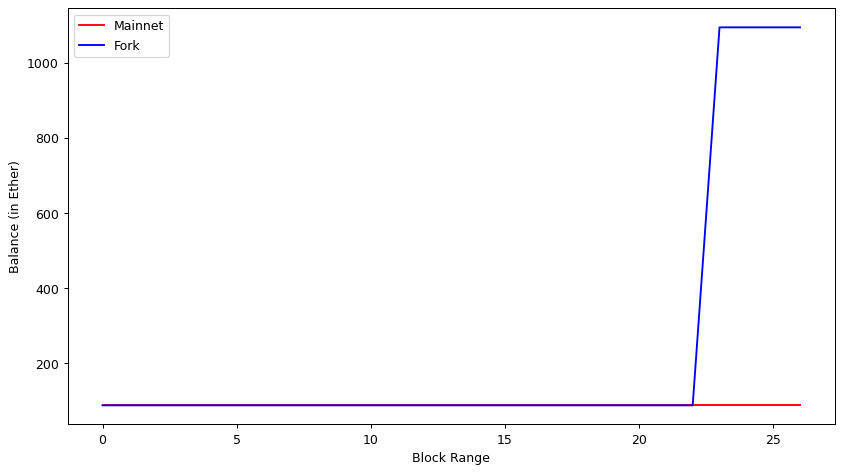

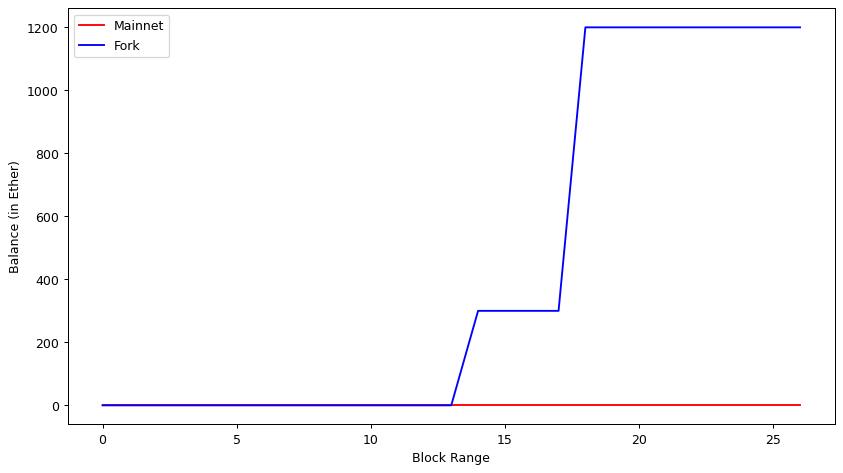

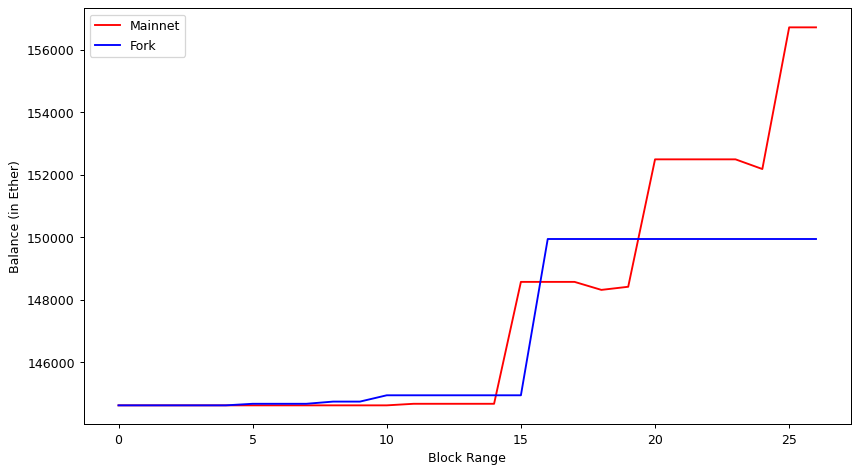

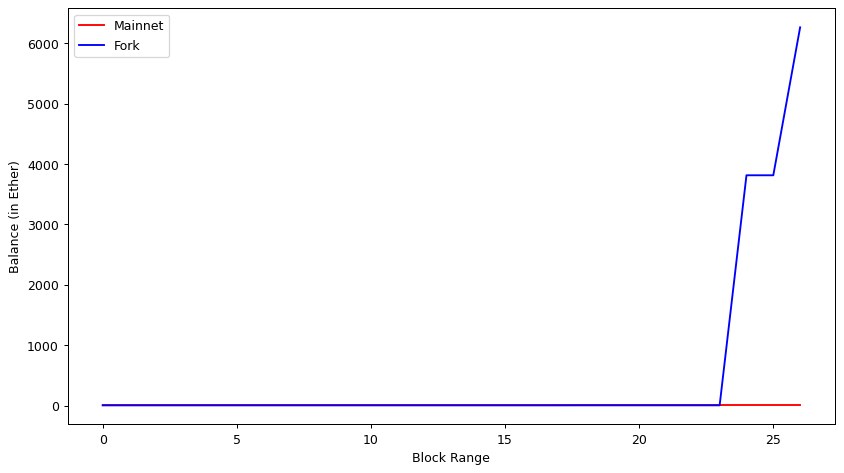

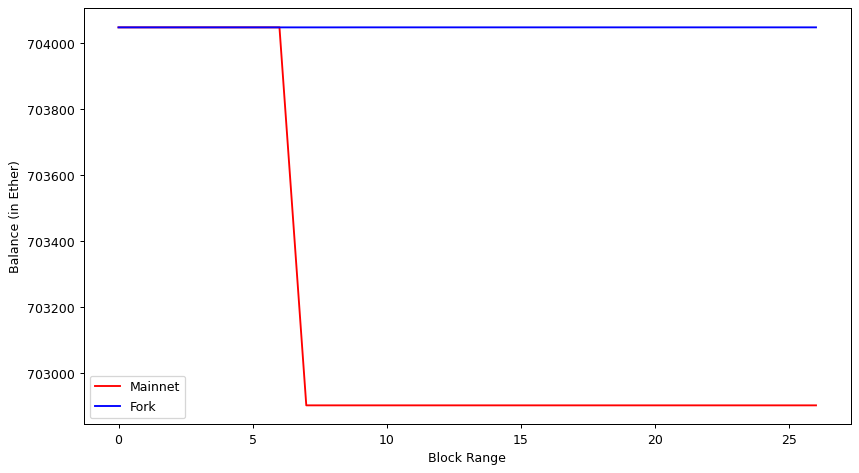

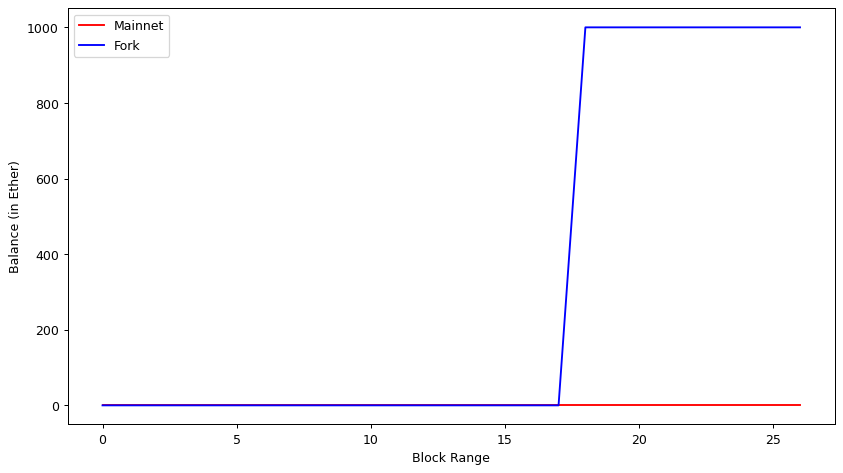

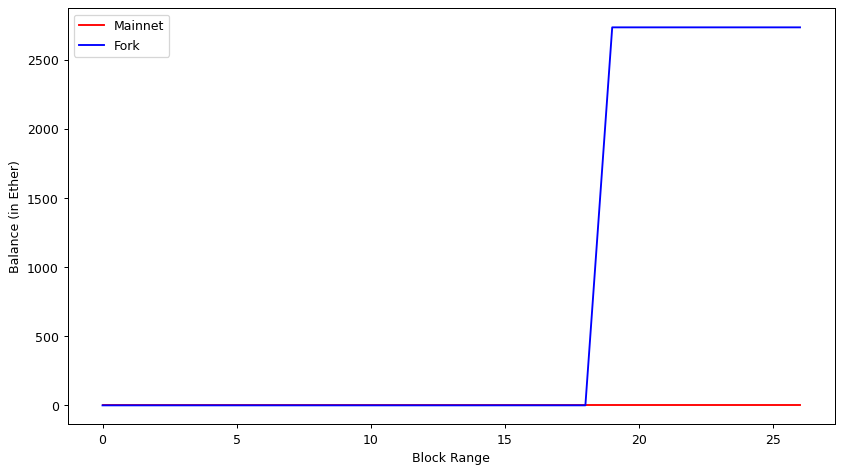

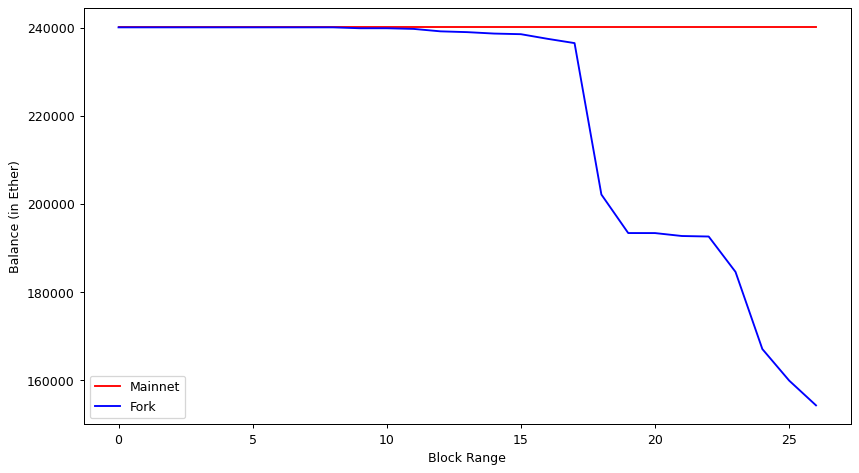

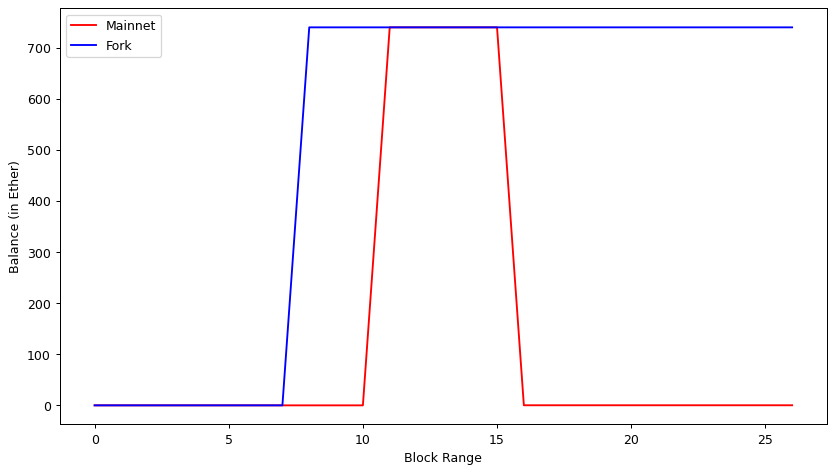

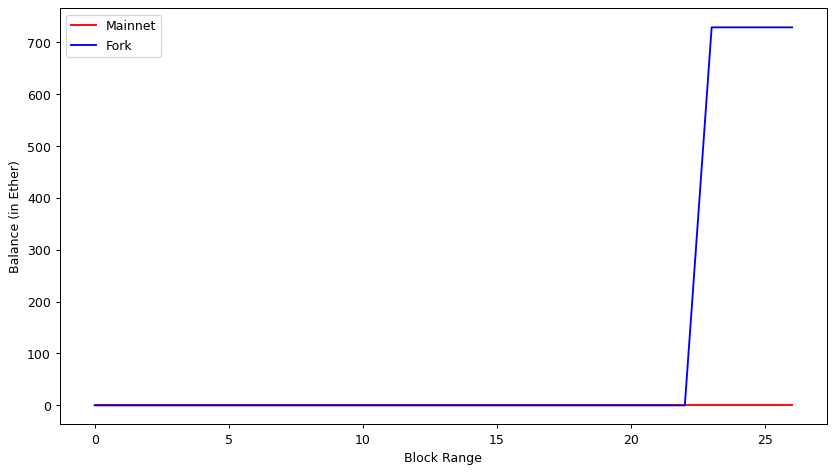

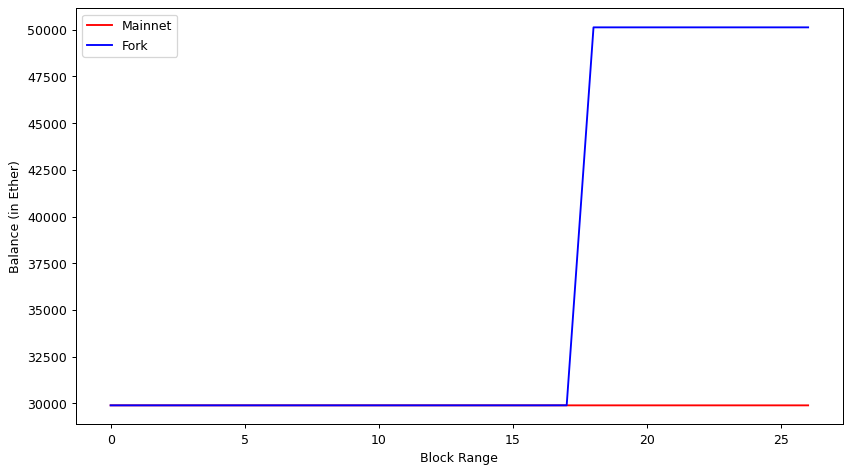

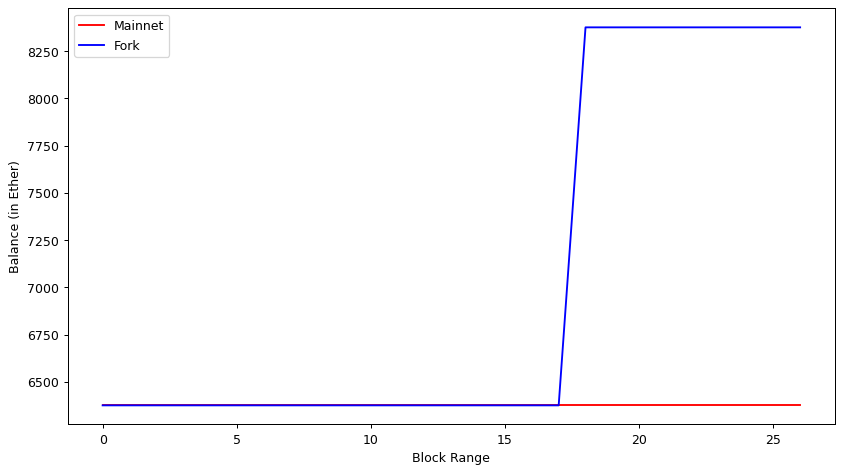

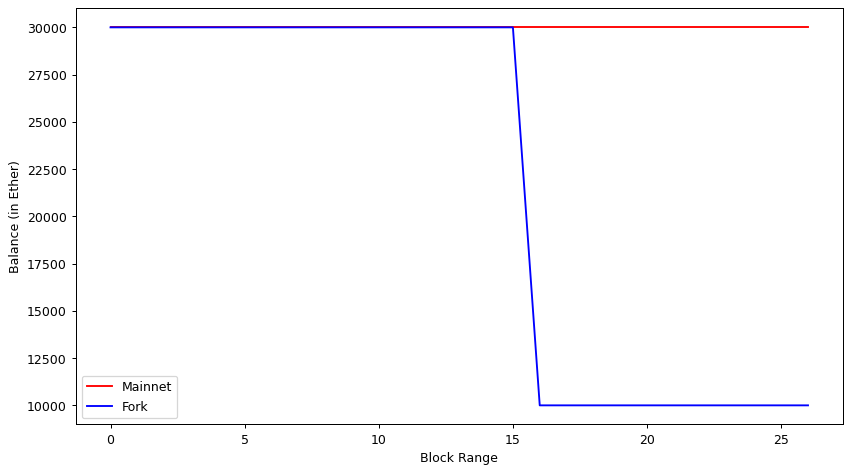

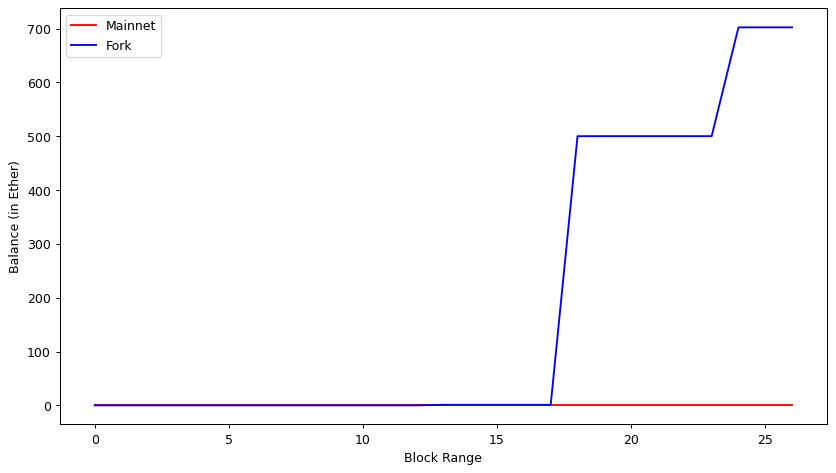

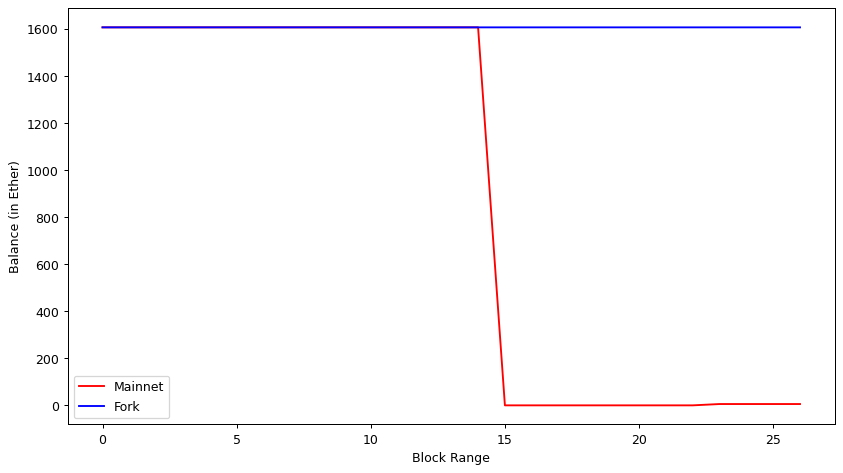

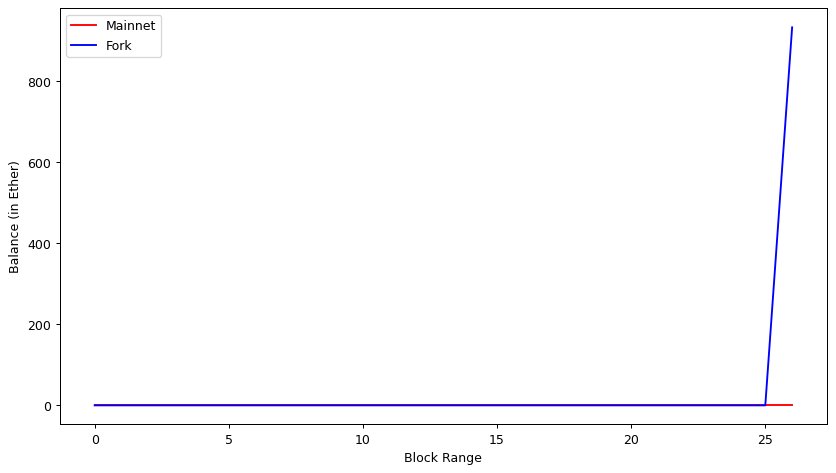

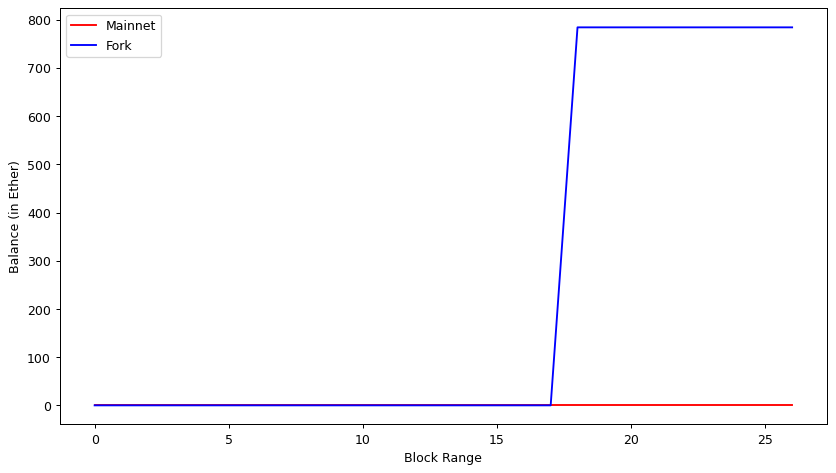

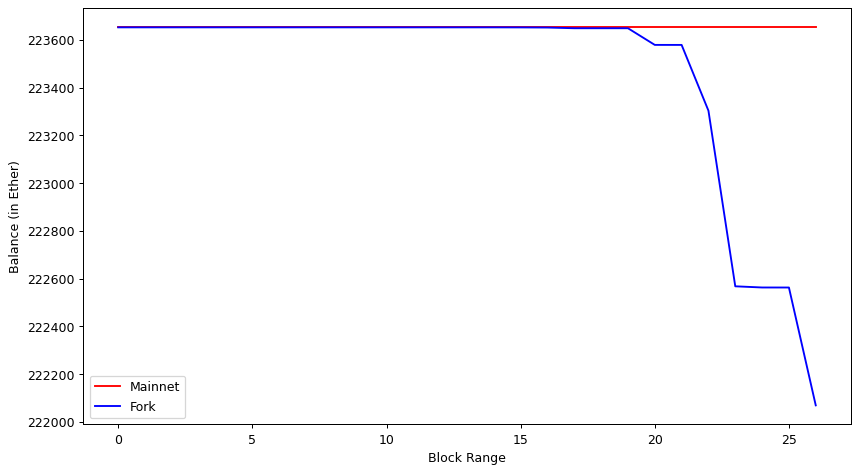

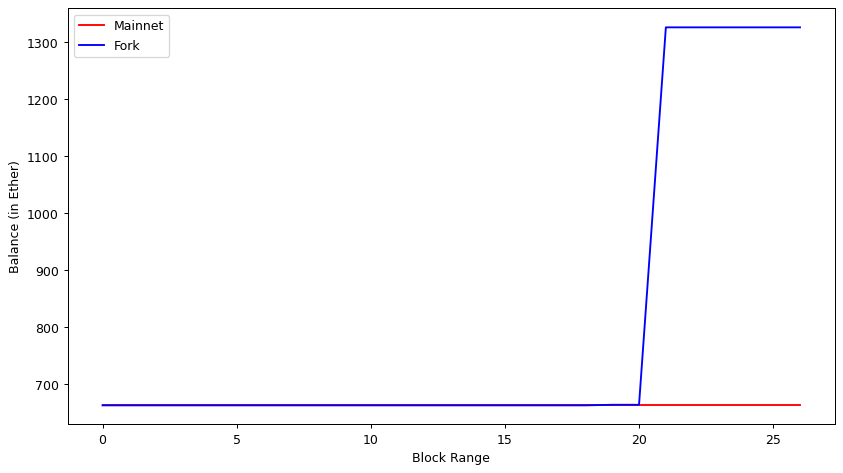

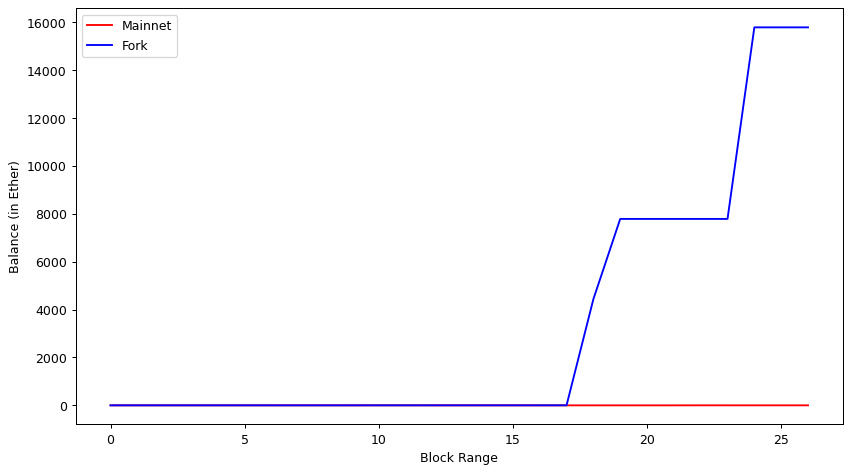

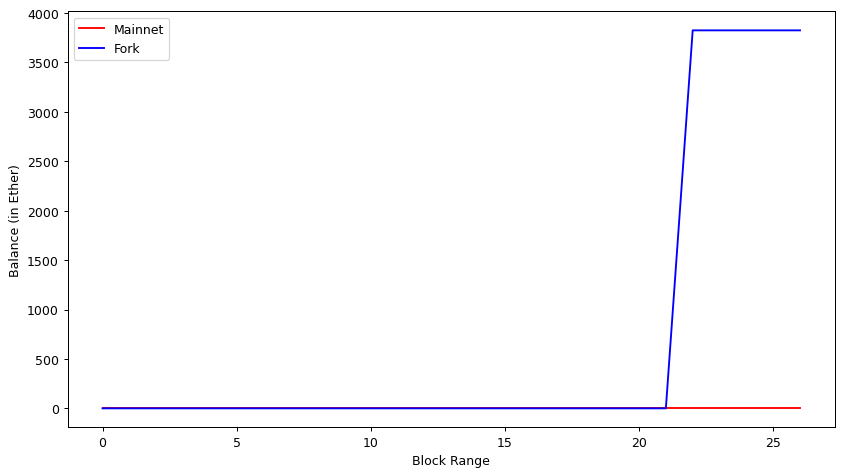

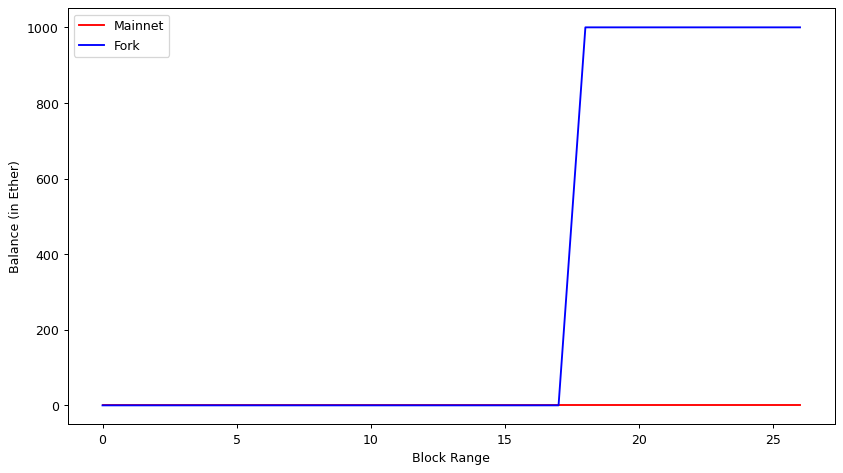

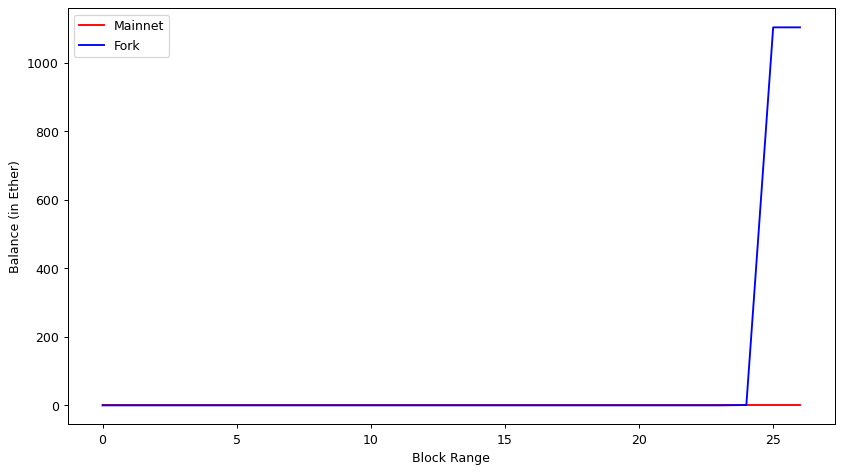

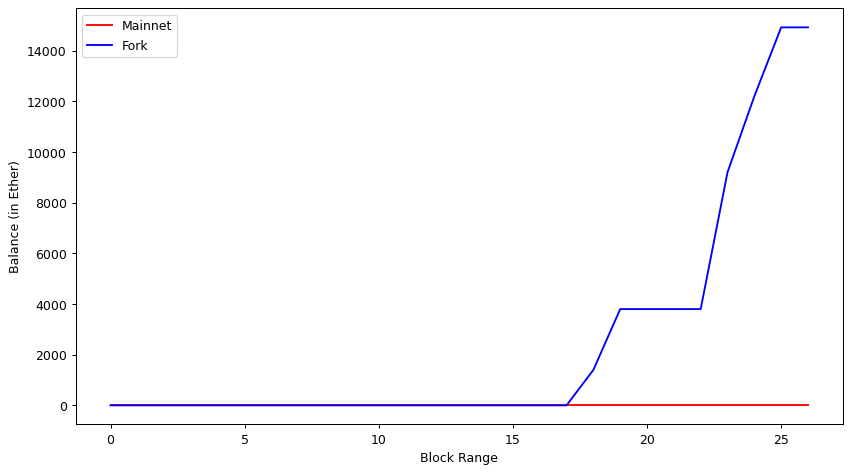

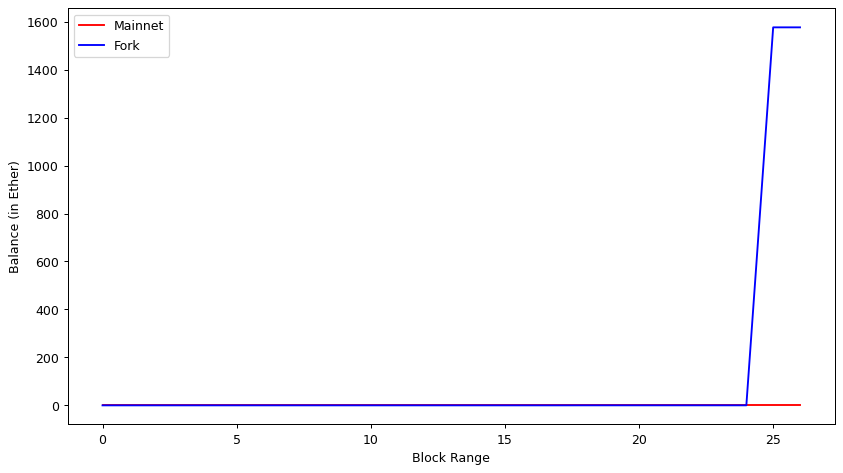

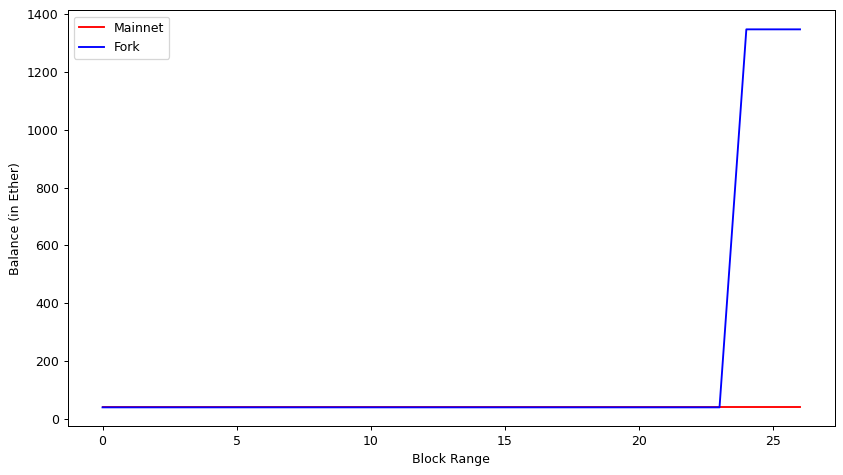

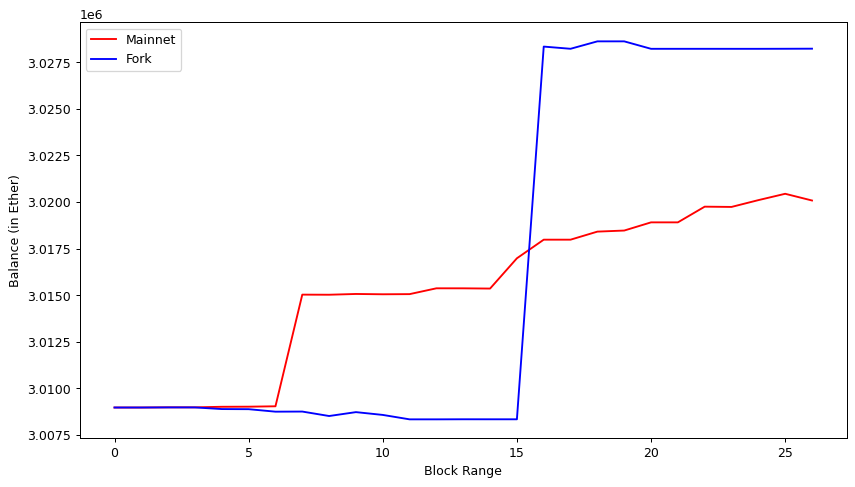

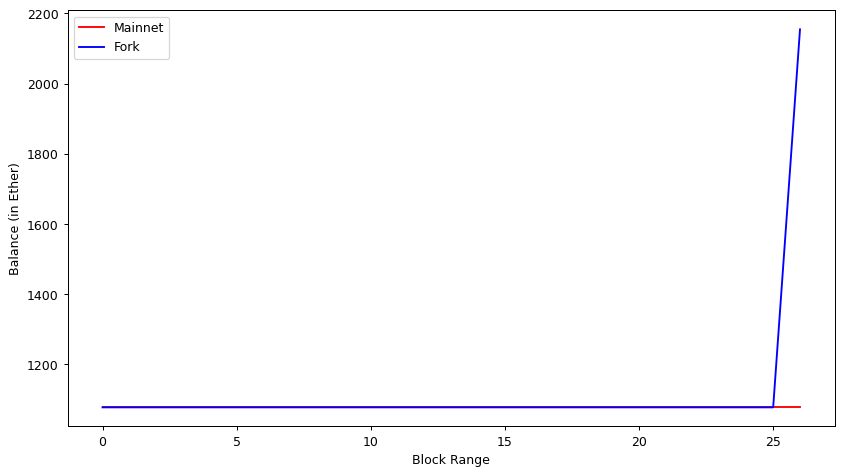

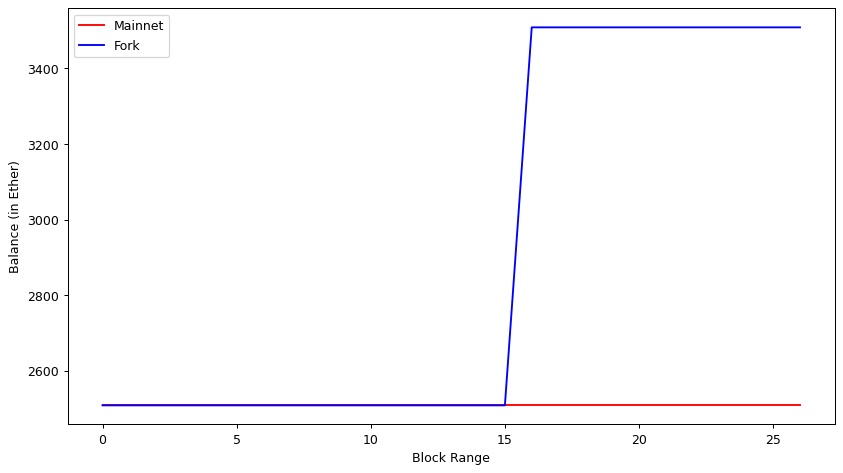

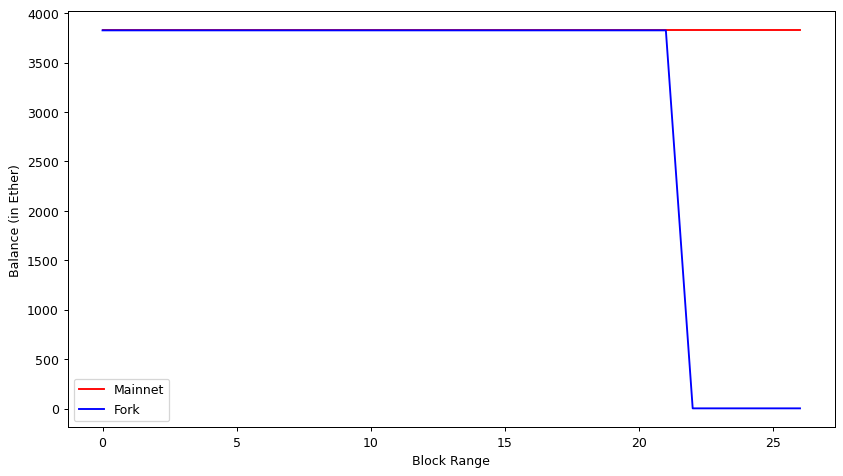

In [11]:
for account in accounts:
    mainnet_balance_ether = [x / 10**18 for x in account["account_balance_mainnet"]]
    fork_balance_ether = [x / 10**18 for x in account["account_balance_fork"]]
    plt.figure(facecolor='white')
    plt.plot(mainnet_balance_ether, label="Mainnet", color="red")
    plt.plot(fork_balance_ether, label="Fork", color="blue")
    plt.legend()
    plt.xlabel("Block Range")
    plt.ylabel("Balance (in Ether)")


    fig = plt.gcf()
    fig.set_dpi(90)
    fig.set_figwidth(11)
    fig.set_figheight(6)
    fig.savefig("graphs/account_balance_account/" + str(account["address"]), dpi=300)

In [22]:
accounts_divergence_list

720     0xc098b2a3aa256d2140208c3de6543aaef5cd3a94
4779    0xcde35b62c27d70b279cf7d0aa1212ffa9e938cef
4513    0x712d0f306956a6a4b4f9319ad9b9de48c5345996
2883    0x5c311563ea0bb8f9ca2471012eb2f495bd687d18
4731    0xccfa0530b9d52f970d1a2daea670ce58e4176389
196     0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2
1264    0xdc24316b9ae028f1497c275eb9192a3ea0f67022
3695    0xc333e80ef2dec2805f239e3f1e810612d294f771
3188    0x9a70ea2ac2f1966dbd6d4500f6ec1176efb285ac
1557    0x05cdb1526f6e224e02919a4c018d9784ea25eb3d
1779    0xeae33deef684802dd05b7026d09fe9831edb7b37
1568    0xa9f00c00ea5fd167da64917267e60f9d9430b321
1823    0xeec534a341335588219b096c20fa256b4c2b46d9
4004    0x25eaff5b179f209cf186b1cdcbfa463a69df4c45
93      0x2d3163874eb816ee4ae2bed01c4b9c2d4a1b5ae4
3496    0x124a863e9fa5393db10db10a92ddad8522df96fa
4436    0xd96ea3bcce83d4e1ef8abd1776eecd0cea1bb09e
4077    0x8315177ab297ba92a06054ce80a67ed4dbd7ed3a
2383    0xbf891e7efcc98a8239385d3172ba10ad593c7886
664     0x66fb1cd65b97fa40457b9

0x5c311563ea0bb8f9ca2471012eb2f495bd687d18 non coin exchange or any ftx relations (nope, this is where a lot of FTX monex ended up)

0xccfa0530b9d52f970d1a2daea670ce58e4176389
0xcde35b62c27d70b279cf7d0aa1212ffa9e938cef
0x712d0f306956a6a4b4f9319ad9b9de48c5345996 Alameda